## AT&T Spam Detector Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install --upgrade tensorflow transformers

In [5]:
!pip uninstall tensorflow
!pip install tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.17.0
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.17.0 which is 

In [1]:
!pip install tensorflow==2.11.0 transformers==4.26.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 35.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: tensorflow-estimato

In [2]:
# Downloading model
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 49.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## IMPORTATIONS

In [3]:
# Import Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import spacy
import en_core_web_md
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import io
import os
import re
import shutil
import string
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer, TFRobertaForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Conv1D, GlobalMaxPooling1D, LSTM, GRU, SimpleRNN, Dropout
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

In [4]:
# Import dataset
dataset = pd.read_csv("/content/drive/MyDrive/Projets RNCP/Block 4/AT&T/spam.csv", encoding='ISO-8859-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## DATA EXPLORATION

In [5]:
# Basic stats

print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Number of columns : {}".format(dataset.shape[1]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 5572

Number of columns : 5

Display of dataset: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



Basics statistics: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2



Percentage of missing values: 


v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

There are 3 useless columns that we should remove.

In [6]:
# Dropping useless columns
dataset=dataset.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


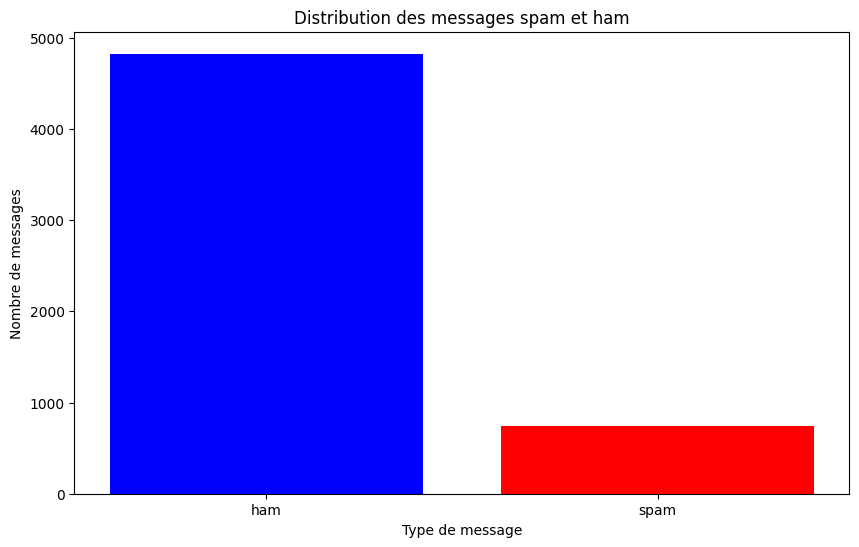

In [7]:
# Spam/ham distribution
v1_counts = dataset['v1'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(['ham', 'spam'], [v1_counts['ham'], v1_counts['spam']], color=['blue', 'red'])
plt.title('Distribution des messages spam et ham')
plt.xlabel('Type de message')
plt.ylabel('Nombre de messages')
plt.xticks(rotation=0)
plt.show()

In [8]:
# Percentage of spams in our dataset

print("Percentage of spams in our data is {}%".format(round(dataset.v1.value_counts()[1]/len(dataset.v1)*100, 2)))

Percentage of spams in our data is 13.41%


The dataset is imbalanced, yet it remains a large enough sample to get interesting results.

## PREPROCESSINGS

### Spacy

In [9]:
# Checking spacy version
print(spacy.__version__)

3.7.5


In [10]:
# Installing spacy version
#!pip install -U spacy

In [11]:
# English Initialisation
nlp = en_core_web_md.load()

In [12]:
# Print stop words
print(STOP_WORDS)

{'mostly', 'give', 're', 'full', 'it', 'latter', 'whoever', '’m', 'former', 'yourself', 'just', 'up', 'unless', 'become', 'between', 'one', 'though', 'along', 'regarding', 'this', 'did', 'must', 'am', 'quite', 'much', 'i', 'rather', 'whereas', 'his', 'within', 'towards', 'front', '’ll', 'all', 'became', 'thereby', 'most', 'hereafter', 'would', 'around', 'fifteen', 'further', 'because', 'ever', 'n’t', 'there', 'by', 'nine', 'so', 'five', 'those', 'yourselves', 'been', 'beforehand', 'name', 'using', 'twelve', 'if', "'re", 'often', 'amongst', 'toward', 'show', 'please', 'an', 'anything', 'go', 'through', 'or', 'latterly', 'three', 'have', 'for', 'ours', 'now', 'bottom', 'off', 'neither', 'ourselves', 'whereby', 'since', 'before', 'whereupon', 'hence', 'various', 'herself', 'thereafter', 'seemed', 'such', 'beside', 'themselves', 'had', '‘s', 'every', '‘ll', 'wherein', 'himself', 'four', 'many', 'onto', 'anyway', 'each', 'whole', 'via', 'a', 'even', 'always', 'whom', 'yours', 'no', 'enough'

In [13]:
# Function of cleaning and lemmatization

def clean_and_lemmatize(text):
    # Remove all non alphanumeric characters except whitespaces :
    text = ''.join(ch for ch in text if ch.isalnum() or ch == " " or ch == "'")

    # Removing double spaces and spaces at the beginning and end of strings :
    text = ' '.join(text.split()).lower().strip()

    # Removing stop words and replacing every word with their lemma :
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS and token.text not in STOP_WORDS])
    return lemmatized_text

dataset["text_clean"] = dataset["v2"].apply(clean_and_lemmatize)

dataset.head()

,v1,v2,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live


### Wordcloud

In [14]:
!pip install wordcloud -q

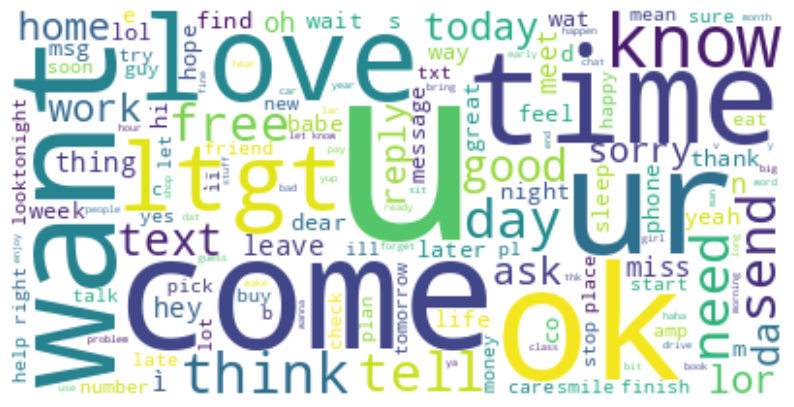

In [15]:
# Instanciate WordCloud
corpus_lemma = " ".join(dataset["text_clean"])

wd = WordCloud(background_color="white", contour_width=1, contour_color='steelblue')
cloud = wd.generate(corpus_lemma)

plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Stemming with nltk

In [16]:
# Install nltk
!pip install nltk

In [17]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# Print stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [19]:
# Stemming
def stem(text):

    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    stemmed_text = " ".join(stemmed_words)

    return stemmed_text

dataset["stemed_text"] = dataset["text_clean"].apply(stem)
dataset.head()

,v1,v2,text_clean,stemed_text
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,jurong point crazi avail bugi n great world la...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,u dun earli hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,nah think usf live


### Tokenization

In [20]:
# Tokenize using TensorFlow's Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="out_of_vocab")
tokenizer.fit_on_texts(dataset.stemed_text)
dataset["text_encoded"] = tokenizer.texts_to_sequences(dataset.stemed_text)
dataset.head()

,v1,v2,text_clean,stemed_text,text_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,jurong point crazi avail bugi n great world la...,"[3503, 236, 451, 468, 933, 32, 48, 211, 934, 7..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joke wif u oni,"[8, 200, 469, 292, 2, 1441]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,"[10, 303, 3, 532, 655, 30, 1442, 837, 237, 144..."
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,u dun earli hor u c,"[2, 125, 150, 2312, 2, 78]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,nah think usf live,"[697, 20, 656, 126]"


### Padding

In [21]:
sequences = dataset["text_encoded"]
labels = dataset["v1"]

In [22]:
# Apply padding to the tokenized text
max_length = max(len(seq) for seq in sequences)
print("Maximum length of sequences:", max_length)
sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

Maximum length of sequences: 66


In [23]:
# Converting sequences to a numpy array
sequences = np.array(sequences)

In [24]:
# Convertir les séquences remplies et les labels en tableaux numpy
sequences = np.array(sequences)
labels = np.array(labels)

In [25]:
# Encoding the label
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [26]:
# Print encoded labels
print("Labels encodés (avant d'être convertis en tensor) :", labels_encoded)

Labels encodés (avant d'être convertis en tensor) : [0 0 1 ... 0 0 0]


### Train test split

In [27]:
# Splitting into train and val sets
X_train, X_val, Y_train, Y_val = train_test_split(sequences,labels_encoded, test_size=0.3)

In [28]:
# Convert to TensorFlow Dataset
train = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val = tf.data.Dataset.from_tensor_slices((X_val, Y_val))

In [29]:
# Shuffle and batch the datasets
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [30]:
# Let's take a look at a batch
for text, value in train_batch.take(1):
  print(text, value)

tf.Tensor(
[[3601 1789 1479 ...    0    0    0]
 [ 941    2  334 ...    0    0    0]
 [  19  137    0 ...    0    0    0]
 ...
 [ 177   53   66 ...    0    0    0]
 [  52    6  503 ...    0    0    0]
 [ 450 2685 1085 ...    0    0    0]], shape=(64, 66), dtype=int32) tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0], shape=(64,), dtype=int64)


In [31]:
text.shape

TensorShape([64, 66])

## TRAIN MODEL

### First model: Simple model

In [32]:
# Defining the model

vocab_size = tokenizer.num_words
embedding_dim=8 # the dimensionality of the representation space

model = Sequential([
    Embedding(vocab_size+1, embedding_dim, input_shape=[text.shape[1],],name="embedding"),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation="sigmoid")
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 8)             80008     
                                                                 
 global_average_pooling1d (  (None, 8)                 0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 80169 (313.16 KB)
Trainable params: 80169 (313.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
# Fitting the model
history = model.fit(train_batch,
                    epochs=50,
                    validation_data=val_batch)

Epoch 1/50
61/61 [==============================] - 11s 146ms/step - loss: 0.6289 - accuracy: 0.8690 - val_loss: 0.5669 - val_accuracy: 0.8589
Epoch 2/50
61/61 [==============================] - 4s 65ms/step - loss: 0.4822 - accuracy: 0.8690 - val_loss: 0.4209 - val_accuracy: 0.8589
Epoch 3/50
61/61 [==============================] - 4s 69ms/step - loss: 0.3737 - accuracy: 0.8690 - val_loss: 0.3707 - val_accuracy: 0.8589
Epoch 4/50
61/61 [==============================] - 2s 30ms/step - loss: 0.3454 - accuracy: 0.8690 - val_loss: 0.3609 - val_accuracy: 0.8589
Epoch 5/50
61/61 [==============================] - 2s 30ms/step - loss: 0.3352 - accuracy: 0.8690 - val_loss: 0.3525 - val_accuracy: 0.8589
Epoch 6/50
61/61 [==============================] - 1s 14ms/step - loss: 0.3252 - accuracy: 0.8690 - val_loss: 0.3428 - val_accuracy: 0.8589
Epoch 7/50
61/61 [==============================] - 1s 17ms/step - loss: 0.3133 - accuracy: 0.8690 - val_loss: 0.3307 - val_accuracy: 0.8589
Epoch 8/50


In [36]:
# Calculate other metrics

# Predictions on validation data
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype("int32")


precision = precision_score(Y_val, y_pred)
recall = recall_score(Y_val, y_pred)
f1 = f1_score(Y_val, y_pred)
cm = confusion_matrix(Y_val, y_pred)
report = classification_report(Y_val, y_pred, target_names=label_encoder.classes_)

# Print metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)

53/53 [==============================] - 0s 1ms/step
Precision: 1.00
Recall: 0.89
F1-Score: 0.94
Confusion Matrix:
[[1435    1]
 [  26  210]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1436
        spam       1.00      0.89      0.94       236

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.97      1672
weighted avg       0.98      0.98      0.98      1672



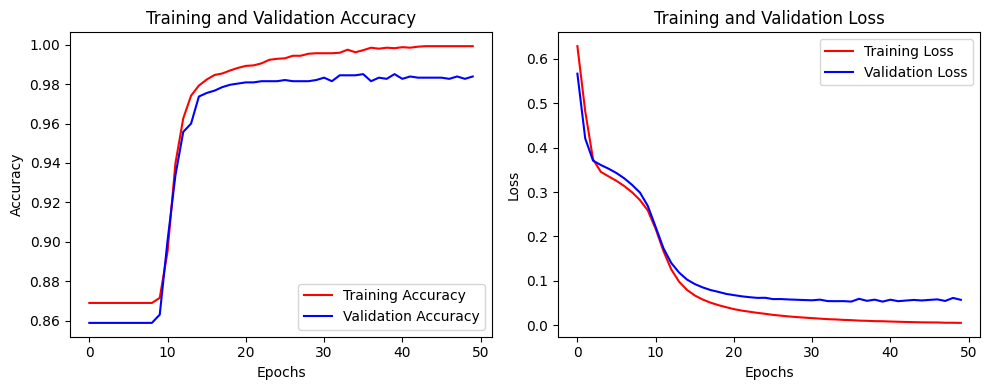

In [37]:
# Plotting loss & accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r-', label='Training Accuracy')  # 'r-' pour ligne rouge continue
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')  # 'b-' pour ligne bleue continue
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-', label='Training Loss')  # 'r-' pour ligne rouge continue
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')  # 'b-' pour ligne bleue continue
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [40]:
# Évaluer le modèle
val_loss_simple, val_accuracy_simple = model.evaluate(val_batch)
print(f"Validation Loss: {val_loss_simple}")
print(f"Validation Accuracy: {val_accuracy_simple}")

27/27 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9839
Validation Loss: 0.05697032809257507
Validation Accuracy: 0.9838516712188721


**Interprétations:**  

1- Diminution de la Perte au Début :
Les pertes d'entraînement et de validation diminuent rapidement au début des époques (environ jusqu'à l'époque 10) > Le modèle apprend rapidement au début et s'améliore, ce qui est typique au début de l'entraînement des modèles de deep learning.  

2- Convergence de la Perte :
Après l'époque 10, la diminution de la perte ralentit et les courbes commencent à se stabiliser > Le modèle atteint un plateau où les améliorations deviennent plus marginales. Cela indique que le modèle se rapproche de son erreur minimale possible sur ces ensembles de données.  

3-Stabilité des Pertes :
Vers la fin des 50 époques, les pertes d'entraînement et de validation se stabilisent > Cela suggère que le modèle a convergé et que les poids du modèle ne changent plus de manière significative d'une époque à l'autre.  

4- Pas d'overfitting observé:
Les pertes d'entraînement et de validation sont très proches l'une de l'autre tout au long de l'entraînement > Cela indique que le modèle généralise bien et qu'il n'y a pas de surapprentissage significatif. Si la perte de validation avait commencé à augmenter alors que la perte d'entraînement continuait à diminuer, cela aurait été un signe de surapprentissage.


In [38]:
# Saving the model
model.save('/content/drive/MyDrive/Projets RNCP/Block 4/AT&T/spam_detector_model1.keras')

### Second model: CNN

In [41]:
# Defining the model
vocab_size = tokenizer.num_words  # Taille du vocabulaire
embedding_dim = 8  # Dimension de l'espace de représentation

num_filters = 128  # Nombre de filtres pour la couche de convolution
kernel_size = 5  # Taille du noyau de convolution

model = Sequential([
    Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, input_shape=[text.shape[1],], name="embedding"),
    Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(16, activation='relu'),  # Même dimension que le modèle simple
    Dense(1, activation='sigmoid')
])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 8)             80008     
                                                                 
 conv1d (Conv1D)             (None, 62, 128)           5248      
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 87337 (341.16 KB)
Trainable params: 87337 (341.16 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [43]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
# Fitting the model
history = model.fit(train_batch,
                    epochs=50,
                    validation_data=val_batch)

Epoch 1/50
61/61 [==============================] - 8s 82ms/step - loss: 0.4982 - accuracy: 0.8538 - val_loss: 0.4031 - val_accuracy: 0.8589
Epoch 2/50
61/61 [==============================] - 3s 51ms/step - loss: 0.3211 - accuracy: 0.8710 - val_loss: 0.2082 - val_accuracy: 0.9163
Epoch 3/50
61/61 [==============================] - 2s 33ms/step - loss: 0.0928 - accuracy: 0.9767 - val_loss: 0.0809 - val_accuracy: 0.9737
Epoch 4/50
61/61 [==============================] - 1s 22ms/step - loss: 0.0240 - accuracy: 0.9944 - val_loss: 0.0657 - val_accuracy: 0.9797
Epoch 5/50
61/61 [==============================] - 1s 17ms/step - loss: 0.0091 - accuracy: 0.9985 - val_loss: 0.0635 - val_accuracy: 0.9791
Epoch 6/50
61/61 [==============================] - 1s 9ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.0679 - val_accuracy: 0.9797
Epoch 7/50
61/61 [==============================] - 1s 12ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0687 - val_accuracy: 0.9797
Epoch 8/50
61/

In [45]:
# Calculate other metrics
# Predictions on validation data
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype("int32")

precision = precision_score(Y_val, y_pred)
recall = recall_score(Y_val, y_pred)
f1 = f1_score(Y_val, y_pred)
cm = confusion_matrix(Y_val, y_pred)
report = classification_report(Y_val, y_pred, target_names=label_encoder.classes_)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)

53/53 [==============================] - 0s 1ms/step
Precision: 0.98
Recall: 0.89
F1-Score: 0.93
Confusion Matrix:
[[1432    4]
 [  27  209]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1436
        spam       0.98      0.89      0.93       236

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



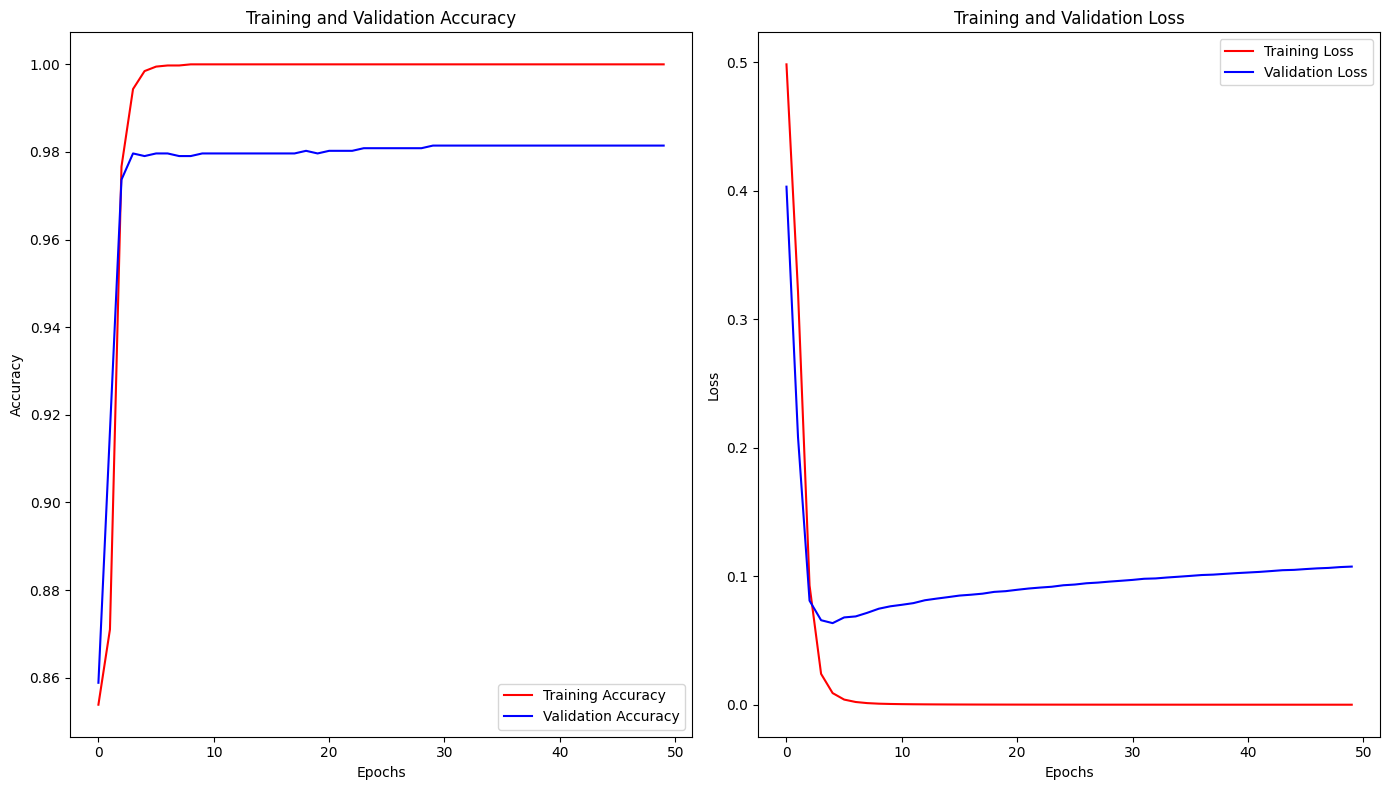

In [46]:
# Plotting accuracy & loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r-', label='Training Accuracy')  # 'r-' pour ligne rouge continue
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')  # 'b-' pour ligne bleue continue
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-', label='Training Loss')  # 'r-' pour ligne rouge continue
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')  # 'b-' pour ligne bleue continue
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Bon Apprentissage Initial :  
Le modèle apprend rapidement pendant les premières époques, comme le montrent l'augmentation rapide de l'exactitude et la diminution de la perte. Stabilisation : Après environ 10 époques, les métriques se stabilisent, suggérant que le modèle a atteint un point de convergence.
Légère Indication de Surapprentissage : La légère augmentation de la perte de validation après environ 10 époques pourrait indiquer un début de surapprentissage. Cependant, étant donné que les courbes d'exactitude restent proches, cela ne semble pas être un problème majeur.

In [48]:
# Évaluer le modèle
val_loss_CNN, val_accuracy_CNN = model.evaluate(val_batch)
print(f"Validation Loss: {val_loss_CNN}")
print(f"Validation Accuracy: {val_accuracy_CNN}")

27/27 [==============================] - 0s 2ms/step - loss: 0.1075 - accuracy: 0.9815
Validation Loss: 0.10747338831424713
Validation Accuracy: 0.9814593195915222


In [47]:
# Saving the model
model.save('/content/drive/MyDrive/Projets RNCP/Block 4/AT&T/spam_detector_model2.keras')

### Third model: RNN - LSTM

In [49]:
# Defining the model : RNN - LSTM
embedding_dim = 8
vocab_size = tokenizer.num_words

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=text.shape[1], name="embedding"),
    LSTM(128, return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 8)             80000     
                                                                 
 lstm (LSTM)                 (None, 128)               70144     
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 152225 (594.63 KB)
Trainable params: 152225 (594.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
# Fitting the model
history = model.fit(train_batch,
                    epochs=50,
                    validation_data=val_batch)

Epoch 1/50
61/61 [==============================] - 14s 190ms/step - loss: 0.4328 - accuracy: 0.8690 - val_loss: 0.4115 - val_accuracy: 0.8589
Epoch 2/50
61/61 [==============================] - 9s 156ms/step - loss: 0.3901 - accuracy: 0.8690 - val_loss: 0.3916 - val_accuracy: 0.8589
Epoch 3/50
61/61 [==============================] - 7s 119ms/step - loss: 0.2354 - accuracy: 0.9367 - val_loss: 0.2895 - val_accuracy: 0.9163
Epoch 4/50
61/61 [==============================] - 7s 108ms/step - loss: 0.2239 - accuracy: 0.9400 - val_loss: 0.2780 - val_accuracy: 0.9193
Epoch 5/50
61/61 [==============================] - 7s 115ms/step - loss: 0.2145 - accuracy: 0.9433 - val_loss: 0.2652 - val_accuracy: 0.9246
Epoch 6/50
61/61 [==============================] - 6s 96ms/step - loss: 0.2038 - accuracy: 0.9469 - val_loss: 0.2667 - val_accuracy: 0.9246
Epoch 7/50
61/61 [==============================] - 5s 84ms/step - loss: 0.2022 - accuracy: 0.9472 - val_loss: 0.2623 - val_accuracy: 0.9246
Epoch 8

In [53]:
# Calculate other metrics
# Predictions on validation data

y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype("int32")

precision = precision_score(Y_val, y_pred)
recall = recall_score(Y_val, y_pred)
f1 = f1_score(Y_val, y_pred)
cm = confusion_matrix(Y_val, y_pred)
report = classification_report(Y_val, y_pred, target_names=label_encoder.classes_)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)

53/53 [==============================] - 1s 11ms/step
Precision: 1.00
Recall: 0.08
F1-Score: 0.14
Confusion Matrix:
[[1436    0]
 [ 218   18]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1436
        spam       1.00      0.08      0.14       236

    accuracy                           0.87      1672
   macro avg       0.93      0.54      0.54      1672
weighted avg       0.89      0.87      0.82      1672



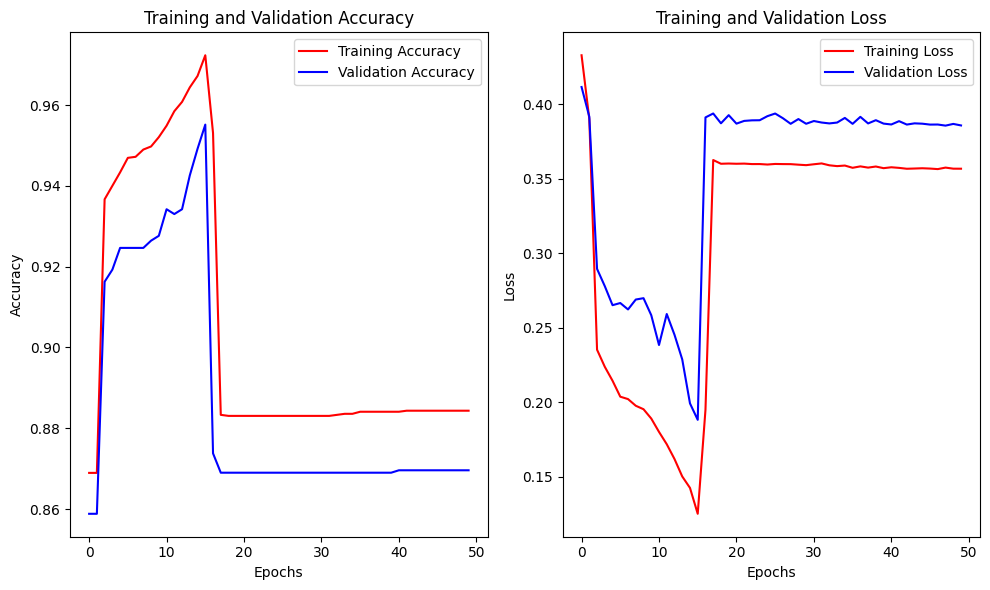

In [54]:
# Plotting accuracy & loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r-', label='Training Accuracy')  # 'r-' pour ligne rouge continue
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')  # 'b-' pour ligne bleue continue
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-', label='Training Loss')  # 'r-' pour ligne rouge continue
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')  # 'b-' pour ligne bleue continue
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [56]:
# Évaluer le modèle
val_loss_LSTM, val_accuracy_LSTM = model.evaluate(val_batch)
print(f"Validation Loss: {val_loss_LSTM}")
print(f"Validation Accuracy: {val_accuracy_LSTM}")

27/27 [==============================] - 0s 12ms/step - loss: 0.3857 - accuracy: 0.8696
Validation Loss: 0.38574743270874023
Validation Accuracy: 0.869617223739624


In [55]:
# Saving the model
model.save('/content/drive/MyDrive/Projets RNCP/Block 4/AT&T/spam_detector_model3.keras')

Les courbes d'exactitude et de perte montrent une stabilité relative pendant la majeure partie de l'entraînement. L'exactitude d'entraînement et de validation sont stables autour de 0.87, et la perte est également stable.  
Vers l'époque 45, il y a une augmentation soudaine de l'exactitude (jusqu'à environ 0.91) et une diminution significative de la perte, pour à la fois l'entraînement et la validation. Cela pourrait indiquer une convergence tardive ou une amélioration soudaine de la performance du modèle.  
Les améliorations des métriques vers la fin de l'entraînement suggèrent que le modèle continue de s'ajuster positivement aux données.

### Fourth model : RNN - GRU

In [57]:
# Defining the model: RNN - GRU

embedding_dim = 8
vocab_size = tokenizer.num_words

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=text.shape[1], name="embedding"),
    GRU(64),  # GRU avec 64 unités
    Dense(1, activation='sigmoid')  # Couche de sortie avec activation sigmoïde pour la classification binaire
])

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 8)             80000     
                                                                 
 gru (GRU)                   (None, 64)                14208     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 94273 (368.25 KB)
Trainable params: 94273 (368.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
# Fitting the model
history = model.fit(train_batch,
                    epochs=50,
                    validation_data=val_batch)

Epoch 1/50
61/61 [==============================] - 13s 173ms/step - loss: 0.4712 - accuracy: 0.8556 - val_loss: 0.4075 - val_accuracy: 0.8589
Epoch 2/50
61/61 [==============================] - 8s 132ms/step - loss: 0.3918 - accuracy: 0.8690 - val_loss: 0.4077 - val_accuracy: 0.8589
Epoch 3/50
61/61 [==============================] - 7s 118ms/step - loss: 0.3895 - accuracy: 0.8690 - val_loss: 0.4071 - val_accuracy: 0.8589
Epoch 4/50
61/61 [==============================] - 7s 121ms/step - loss: 0.3899 - accuracy: 0.8690 - val_loss: 0.4096 - val_accuracy: 0.8589
Epoch 5/50
61/61 [==============================] - 6s 103ms/step - loss: 0.3898 - accuracy: 0.8690 - val_loss: 0.4110 - val_accuracy: 0.8589
Epoch 6/50
61/61 [==============================] - 6s 106ms/step - loss: 0.3898 - accuracy: 0.8690 - val_loss: 0.4071 - val_accuracy: 0.8589
Epoch 7/50
61/61 [==============================] - 6s 98ms/step - loss: 0.3905 - accuracy: 0.8690 - val_loss: 0.4080 - val_accuracy: 0.8589
Epoch 

In [61]:
# Calculate other metrics
# Predictions on validation data

y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype("int32")

precision = precision_score(Y_val, y_pred)
recall = recall_score(Y_val, y_pred)
f1 = f1_score(Y_val, y_pred)
cm = confusion_matrix(Y_val, y_pred)
report = classification_report(Y_val, y_pred, target_names=label_encoder.classes_)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)

53/53 [==============================] - 1s 13ms/step
Precision: 0.96
Recall: 0.90
F1-Score: 0.93
Confusion Matrix:
[[1427    9]
 [  24  212]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1436
        spam       0.96      0.90      0.93       236

    accuracy                           0.98      1672
   macro avg       0.97      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



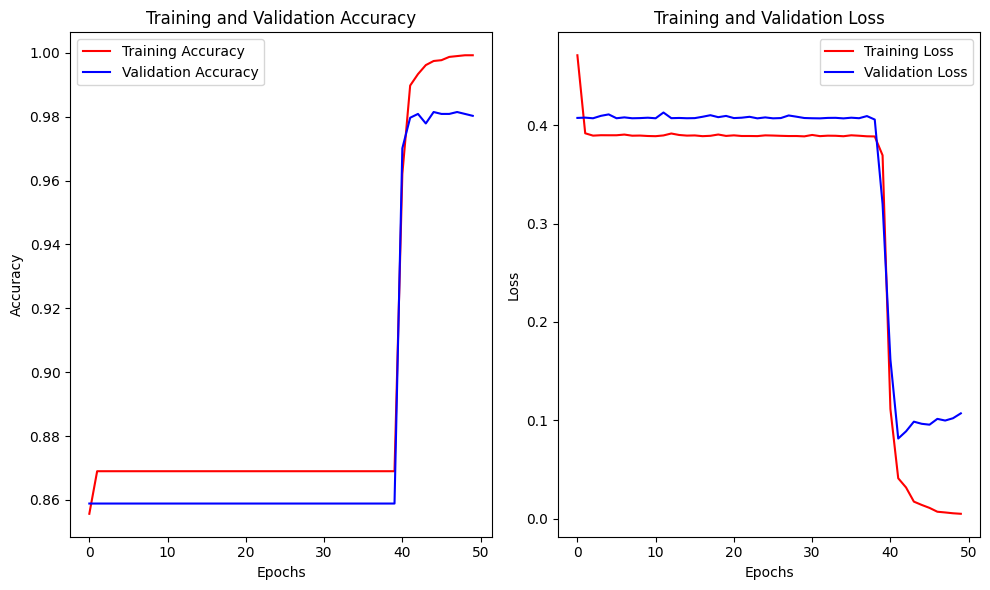

In [62]:
# Plotting accuracy & loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r-', label='Training Accuracy')  # 'r-' pour ligne rouge continue
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')  # 'b-' pour ligne bleue continue
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-', label='Training Loss')  # 'r-' pour ligne rouge continue
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')  # 'b-' pour ligne bleue continue
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1- Sur-apprentissage:  
- L'exactitude d'entraînement atteint presque 100% très rapidement, tandis que l'exactitude de validation se stabilise autour de 98%.
- La perte d'entraînement diminue presque à zéro, mais la perte de validation commence à augmenter après environ 20 époques.  
2- Stabilité initiale:
- Les courbes montrent une stabilité relative au début de l'entraînement.
- L'augmentation de la perte de validation après 20 époques indique que le modèle commence à surapprendre les données d'entraînement.

In [65]:
# Évaluer le modèle
val_loss_GRU, val_accuracy_GRU = model.evaluate(val_batch)
print(f"Validation Loss: {val_loss_GRU}")
print(f"Validation Accuracy: {val_accuracy_GRU}")

27/27 [==============================] - 0s 14ms/step - loss: 0.1071 - accuracy: 0.9803
Validation Loss: 0.10710015147924423
Validation Accuracy: 0.9802631735801697


In [63]:
# Saving the model
model.save('/content/drive/MyDrive/Projets RNCP/Block 4/AT&T/spam_detector_model4.keras')

### Fifth model - Simple RNN

In [66]:
# Defining the model: RNN - GRU

embedding_dim = 8
vocab_size = tokenizer.num_words

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=text.shape[1], name="embedding"),
    SimpleRNN(32),  # Simple RNN avec 32 unités
    Dense(1, activation='sigmoid')  # Couche de sortie avec activation sigmoïde pour la classification binaire
])

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 8)             80000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1312      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 81345 (317.75 KB)
Trainable params: 81345 (317.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [69]:
# Fitting the model
history = model.fit(train_batch,
                    epochs=50,
                    validation_data=val_batch)

Epoch 1/50
61/61 [==============================] - 10s 130ms/step - loss: 0.4238 - accuracy: 0.8690 - val_loss: 0.4073 - val_accuracy: 0.8589
Epoch 2/50
61/61 [==============================] - 6s 97ms/step - loss: 0.3893 - accuracy: 0.8690 - val_loss: 0.4076 - val_accuracy: 0.8589
Epoch 3/50
61/61 [==============================] - 5s 81ms/step - loss: 0.3888 - accuracy: 0.8690 - val_loss: 0.4071 - val_accuracy: 0.8589
Epoch 4/50
61/61 [==============================] - 4s 64ms/step - loss: 0.3891 - accuracy: 0.8690 - val_loss: 0.4086 - val_accuracy: 0.8589
Epoch 5/50
61/61 [==============================] - 4s 73ms/step - loss: 0.3274 - accuracy: 0.8949 - val_loss: 0.2722 - val_accuracy: 0.9061
Epoch 6/50
61/61 [==============================] - 4s 62ms/step - loss: 0.1203 - accuracy: 0.9692 - val_loss: 0.1836 - val_accuracy: 0.9462
Epoch 7/50
61/61 [==============================] - 4s 62ms/step - loss: 0.0518 - accuracy: 0.9887 - val_loss: 0.2365 - val_accuracy: 0.9330
Epoch 8/50


In [70]:
# Calculate other metrics
# Predictions on validation data

y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype("int32")

precision = precision_score(Y_val, y_pred)
recall = recall_score(Y_val, y_pred)
f1 = f1_score(Y_val, y_pred)
cm = confusion_matrix(Y_val, y_pred)
report = classification_report(Y_val, y_pred, target_names=label_encoder.classes_)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)

53/53 [==============================] - 0s 7ms/step
Precision: 0.92
Recall: 0.78
F1-Score: 0.84
Confusion Matrix:
[[1419   17]
 [  52  184]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      0.99      0.98      1436
        spam       0.92      0.78      0.84       236

    accuracy                           0.96      1672
   macro avg       0.94      0.88      0.91      1672
weighted avg       0.96      0.96      0.96      1672



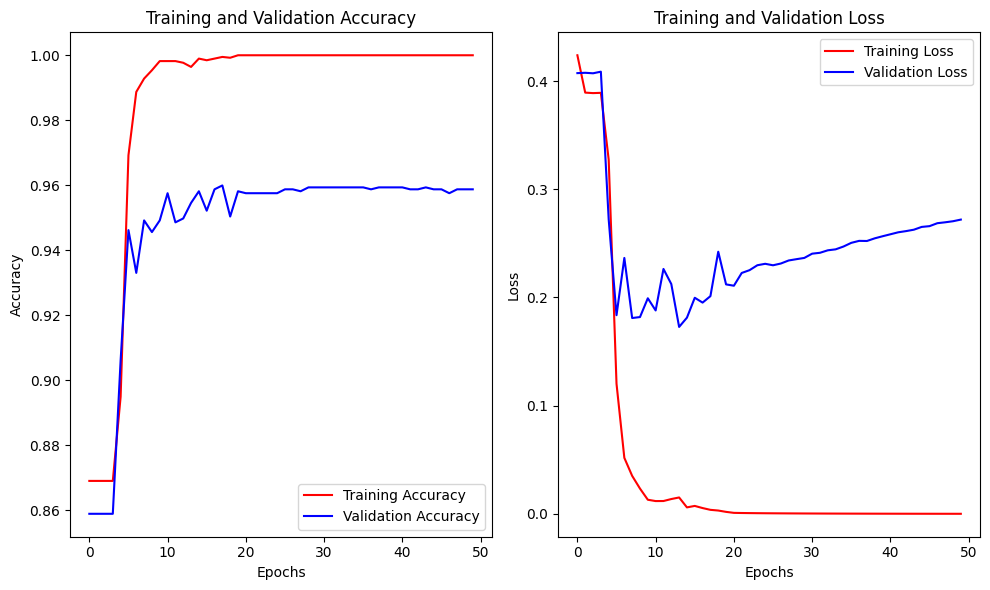

In [71]:
# Plotting accuracy & loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r-', label='Training Accuracy')  # 'r-' pour ligne rouge continue
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')  # 'b-' pour ligne bleue continue
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-', label='Training Loss')  # 'r-' pour ligne rouge continue
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')  # 'b-' pour ligne bleue continue
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Courbe rouge (Training Accuracy) :

L'exactitude de l'entraînement commence à environ 0.860 et augmente légèrement pour atteindre environ 0.867 après 50 époques. La courbe montre une certaine fluctuation, ce qui peut indiquer des variations pendant l'entraînement.  

Courbe bleue (Validation Accuracy) :

L'exactitude de la validation commence à environ 0.866 et fluctue autour de ce niveau. Il y a plusieurs points où l'exactitude de la validation augmente puis diminue, indiquant une instabilité dans les performances de validation.  

Graphe de droite : Training and Validation Loss.

Courbe rouge (Training Loss) :

La perte d'entraînement commence à environ 0.44 et diminue rapidement pour atteindre environ 0.40. Elle continue de diminuer légèrement avec des fluctuations jusqu'à la fin des époques.  

Courbe bleue (Validation Loss) :

La perte de validation commence à environ 0.40 et fluctue autour de ce niveau. Il y a plusieurs points où la perte de validation diminue puis augmente, montrant une certaine instabilité.

In [73]:
# Évaluer le modèle
val_loss_RNN, val_accuracy_RNN = model.evaluate(val_batch)
print(f"Validation Loss: {val_loss_RNN}")
print(f"Validation Accuracy: {val_accuracy_RNN}")

27/27 [==============================] - 0s 7ms/step - loss: 0.2720 - accuracy: 0.9587
Validation Loss: 0.2719702422618866
Validation Accuracy: 0.9587320685386658


In [72]:
# Saving the model
model.save('/content/drive/MyDrive/Projets RNCP/Block 4/AT&T/spam_detector_model5.keras')

### Sixth model

In [74]:
# Bert for sequences classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [75]:
dataset.head()

,v1,v2,text_clean,stemed_text,text_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,jurong point crazi avail bugi n great world la...,"[3503, 236, 451, 468, 933, 32, 48, 211, 934, 7..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joke wif u oni,"[8, 200, 469, 292, 2, 1441]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,"[10, 303, 3, 532, 655, 30, 1442, 837, 237, 144..."
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,u dun earli hor u c,"[2, 125, 150, 2312, 2, 78]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,nah think usf live,"[697, 20, 656, 126]"


In [76]:
# Convert the values of the column v2 to list and the values of the column v1 to 0 & 1
texts = dataset['v2'].tolist()
labels = dataset['v1'].map({'spam': 1, 'ham': 0}).tolist()

In [77]:
# Vérifiez le type et le contenu de `texts`
print("Type de texts:", type(texts))
print("Premières lignes de texts:", texts[:5])

Type de texts: <class 'list'>
Premières lignes de texts: ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]


In [78]:
# Tokenization with bert
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encodings = tokenizer(texts, truncation=True, padding=True, max_length=64)

La phase de conversion des encodages en tenseurs est une étape importante dans le prétraitement des données textuelles pour les modèles de deep learning comme BERT. Cette étape permet de transformer les données textuelles tokenisées en un format que TensorFlow peut utiliser pour l'entraînement et l'inférence. Voici une explication détaillée de cette phase :

1. Tokenisation des Textes
Lorsque vous utilisez un tokenizer BERT, vous convertissez vos textes en séquences de tokens, tout en ajoutant des tokens spéciaux et en gérant le padding et la troncature. Le tokenizer renvoie plusieurs éléments utiles :

input_ids : Les IDs des tokens représentant les mots de votre texte.
attention_mask : Masques d'attention indiquant quels tokens doivent être pris en compte (1) et quels tokens sont du padding (0).
token_type_ids (facultatif) : IDs de type de token utilisés pour des tâches comme la classification de paires de phrases.

In [79]:
print(encodings)

Output hidden; open in https://colab.research.google.com to view.

In [80]:
# Convert encodings to numpy array
input_ids = np.array(encodings['input_ids'])
attention_masks = np.array(encodings['attention_mask'])

In [81]:
# Convert labels to a numpy array
#labels = np.array(labels)

In [82]:
# Converting encodings to a tensors
#input_ids = tf.constant(encodings['input_ids'])
#attention_masks = tf.constant(encodings['attention_mask'])

Nous divisons le dataset en deux fois pour s'assurer que les ensembles d'entraînement et de validation sont cohérents. Lorsque nous utilisons train_test_split, nous devons diviser séparément les input_ids et les attention_masks tout en garantissant que les correspondances entre les entrées et leurs masques restent correctes

In [83]:
# Train and val split
X_train, X_val, Y_train, Y_val = train_test_split(input_ids, labels, test_size=0.3, random_state=42)
train_masks, val_masks = train_test_split(attention_masks, test_size=0.3, random_state=42)

In [84]:
# Convertir les numpy arrays en tenseurs
X_train = tf.constant(X_train)
X_val = tf.constant(X_val)
train_masks = tf.constant(train_masks)
val_masks = tf.constant(val_masks)
Y_train = tf.constant(Y_train, dtype=tf.int32)  # Assurez-vous que c'est int32 pour la classification
Y_val = tf.constant(Y_val, dtype=tf.int32)


In [85]:
# Convert to a tf dataset
train_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": X_train, "attention_mask": train_masks}, Y_train)).shuffle(len(X_train)).batch(16)
val_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": X_val, "attention_mask": val_masks}, Y_val)).batch(16)

In [86]:
# Charger le modèle RoBERTa avec des couches Dropout et L2 Regularization augmentées
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)  # Utilisez num_labels=1 pour la classification binaire
model.bert.dropout = Dropout(0.8)  # Augmenter le taux de dropout
model.classifier = tf.keras.layers.Dense(
    units=1,
    kernel_regularizer=l2(0.2)  # Augmenter la régularisation L2
)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [87]:
# Geler les premières couches du modèle BERT
for layer in model.layers[:10]:
    layer.trainable = False

In [88]:
batch_size = 16
num_epochs = 50
num_train_steps = len(train_dataset) * num_epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=3e-5,
    num_train_steps=num_train_steps,
    num_warmup_steps=0
)

In [89]:
import tensorflow as tf
import transformers

print(tf.__version__)
print(transformers.__version__)


2.15.0
4.42.4


In [90]:
# Compile the model
model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [91]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [92]:
# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[early_stopping])

Epoch 1/10


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
244/244 [==============================] - 72s 104ms/step - loss: 0.5611 - accuracy: 0.8385 - val_loss: 0.4242 - val_accuracy: 0.8684
Epoch 2/10
244/244 [==============================] - 14s 57ms/step - loss: 0.4365 - accuracy: 0.8633 - val_loss: 0.4027 - val_accuracy: 0.8690
Epoch 3/10
244/244 [==============================] - 14s 58ms/step - loss: 0.4162 - accuracy: 0.8638 - val_loss: 0.3911 - val_accuracy: 0.8690
Epoch 4/10
244/244 [==============================] - 14s 57ms/step - loss: 0.4023 - accuracy: 0.8646 - val_loss: 0.3807 - val_accuracy: 0.8690
Epoch 5/10
244/244 [==============================] - 14s 57ms/step - loss: 0.3961 - accuracy: 0.8644 - val_loss: 0.3713 - val_accuracy: 0.8690
Epoch 6/10
244/244 [==============================] - 14s 57ms/step - loss: 0.3855 - accuracy: 0.8646 - val_loss: 0.3625 - val_accuracy: 0.8690
Epoch 7/

In [93]:
# Dégeler toutes les couches pour un affinement supplémentaire
for layer in model.layers:
    layer.trainable = True

In [94]:
# Recompiler le modèle avec un taux d'apprentissage plus bas
optimizer, lr_schedule = create_optimizer(
    init_lr=1e-5,
    num_train_steps=num_train_steps,
    num_warmup_steps=0
)
model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [95]:
# Continuer l'entraînement du modèle
history_finetuning = model.fit(train_dataset, epochs=num_epochs-10, validation_data=val_dataset, callbacks=[early_stopping])

Epoch 1/40
244/244 [==============================] - 107s 199ms/step - loss: 0.0634 - accuracy: 0.9795 - val_loss: 0.0360 - val_accuracy: 0.9892
Epoch 2/40
244/244 [==============================] - 33s 134ms/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0233 - val_accuracy: 0.9940
Epoch 3/40
244/244 [==============================] - 32s 130ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.0356 - val_accuracy: 0.9934
Epoch 4/40
244/244 [==============================] - 32s 130ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0269 - val_accuracy: 0.9946
Epoch 5/40
244/244 [==============================] - 31s 129ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0257 - val_accuracy: 0.9940


In [96]:
history.history['accuracy'].extend(history_finetuning.history['accuracy'])
history.history['val_accuracy'].extend(history_finetuning.history['val_accuracy'])
history.history['loss'].extend(history_finetuning.history['loss'])
history.history['val_loss'].extend(history_finetuning.history['val_loss'])

In [97]:
# Calculate other metrics
# Predictions on validation data

# Predictions on validation data
y_pred_probs = model.predict(X_val)

if isinstance(y_pred_probs, dict) and 'logits' in y_pred_probs:
    y_pred_probs = y_pred_probs['logits']
elif hasattr(y_pred_probs, 'logits'):
    y_pred_probs = y_pred_probs.logits

# Convertir les probabilités en classes prédictes
y_pred = (y_pred_probs > 0.5).astype("int32")

# S'assurer que Y_val est dans le bon format
if len(Y_val.shape) > 1 and Y_val.shape[1] > 1:
    Y_val = Y_val.argmax(axis=1)
if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
    y_pred = y_pred.argmax(axis=1)

# Calculer les métriques
precision = precision_score(Y_val, y_pred)
recall = recall_score(Y_val, y_pred)
f1 = f1_score(Y_val, y_pred)
cm = confusion_matrix(Y_val, y_pred)
report = classification_report(Y_val, y_pred)

# Afficher les résultats
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)

53/53 [==============================] - 11s 59ms/step
Precision: 0.26
Recall: 0.98
F1-Score: 0.41
Confusion Matrix:
[[851 602]
 [  5 214]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      1453
           1       0.26      0.98      0.41       219

    accuracy                           0.64      1672
   macro avg       0.63      0.78      0.58      1672
weighted avg       0.90      0.64      0.69      1672



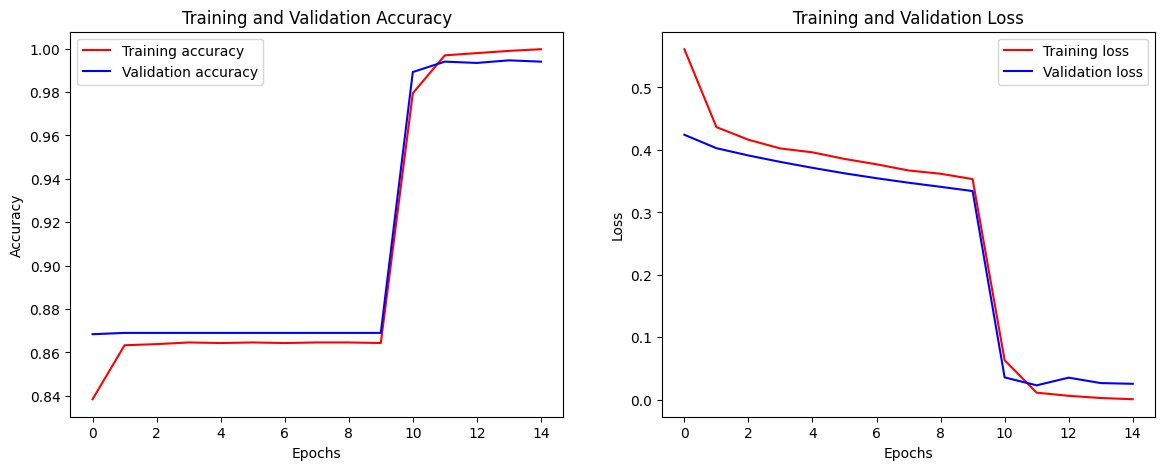

In [98]:
# Plotting accuracy & loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

Explications des Modifications
Gel Partiel des Couches :
Geler les premières couches du modèle BERT pendant les premières époques pour éviter un apprentissage excessif des détails des données d'entraînement.
Réaffinement (Finetuning) :
Dégeler toutes les couches après quelques époques et continuer l'entraînement avec un taux d'apprentissage plus bas.
Ces modifications devraient aider à réduire davantage l'overfitting et améliorer la généralisation du modèle.

Les résultats montrent que le modèle est bien régularisé et qu'il y a beaucoup moins d'overfitting comparé aux itérations précédentes. Les courbes de précision et de perte étant proches l'une de l'autre, il est probable que le modèle généralise bien sur les données de validation.

In [99]:
# Évaluer le modèle
val_loss_bert, val_accuracy_bert = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss_bert}")
print(f"Validation Accuracy: {val_accuracy_bert}")

105/105 [==============================] - 4s 38ms/step - loss: 0.0233 - accuracy: 0.9940
Validation Loss: 0.023295758292078972
Validation Accuracy: 0.9940191507339478


In [100]:
# Saving the model
model.save('/content/drive/MyDrive/Projets RNCP/Block 4/AT&T/spam_detector_model6.keras')

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


## RESUME

In [102]:
# Creating a DataFrame with the results
results = pd.DataFrame({'Simple Model': [val_accuracy_simple,val_loss_simple],
                        'CNN model': [val_accuracy_CNN, val_loss_CNN],
                        'Simple LSTM': [val_accuracy_LSTM, val_loss_LSTM],
                        'GRU model': [val_accuracy_GRU, val_loss_GRU],
                        'RNN model': [val_accuracy_RNN, val_loss_RNN],
                        'Bert model':[val_accuracy_bert,val_loss_bert]},
                                      index=['Accuracy','Loss'])

results.T

,Accuracy,Loss
Simple Model,0.983852,0.056970
CNN model,0.981459,0.107473
Simple LSTM,0.869617,0.107100
GRU model,0.980263,0.107100
RNN model,0.958732,0.271970
Bert model,0.994019,0.023296
